In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go

init_notebook_mode(connected=True)

/home/calre/anaconda2/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
geocodes = pd.read_csv('../data/processed/geocoded_properties.csv')
principals = pd.read_csv('../data/processed/props_to_principals.csv')

In [3]:
last_names = []
with open('../data/processed/last_names.txt', 'r') as f:
    for line in f:
        line = line.replace("\n", "")
        last_names.append(line)

In [26]:
def mapper(name):

    lats, lngs, text = get_marker_data(name)

    mapbox_access_token = 'pk.eyJ1IjoiY2FscmVtbWVsIiwiYSI6ImNqc25scWtiMzBkcGI0M3BtNDRrbnFvNGoifQ.qmi7OtQn6vIJbHbbTZs2MQ'

    data = [
        go.Scattermapbox(
            lat=lats,
            lon=lngs,
            mode='markers',
            marker=dict(
                size=8
            ),
            text=text,
        )
    ]

    layout = go.Layout(
        width=600,
        height=800,
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            layers = layers,
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=44.5,
                lon=-73.23
            ),
            pitch=0,
            zoom=11.2
        ),
    )

    fig = dict(data=data, layout=layout)

    iplot(fig, filename=name + " map")

In [4]:
import re

def findWholeWord(word, sentence):
    result = re.compile(r'\b({0})\b'.format(word), flags=re.IGNORECASE).search(sentence)
    if result:
        return True
    else:
        return False

In [5]:
def currency(number):
    return '${:,.2f}'.format(number)

In [35]:
def get_marker_data(name):
    
    df = name_search(name)
    data = pd.merge(df, geocodes, how='left', left_on='property_id', right_on='Parcel ID')
    
    lats = data.Latitude
    lngs = data.Longitude
    text1 = data.owner_name
    text2 = data['Listed Real Value'].map(currency)
    text = "Listed Owner: " + text1 + "<br>" + "Value: " + text2
    
    return data.columns
#     return lats, lngs, text

In [34]:
def name_search(name, df=principals, institutions=False):
    
    df=df
    name=name.upper()
    
    inst_lst = [45152.0, 43409.0, 46484.0, 46891.0]
    
    principal_bool = df.principals.map(lambda x: findWholeWord(name, x))
    owner_bool = df.owner_name.map(lambda x: findWholeWord(name, x))
    
    data = df[
        principal_bool | owner_bool
    ].sort_values(
        ['property_id', 'owner_name', 'principals']
    ).drop_duplicates(subset=['property_id'])
    
    if institutions == False:
        data = data[data['business_id'].isin(inst_lst) == False]
    
    return data

In [36]:
get_marker_data("handy")

Index(['Unnamed: 0_x', 'business_id', 'owner_name', 'principals',
       'property_id', 'property_real_value', 'Unnamed: 0_y', 'lookup-id',
       'Owner Name 1', 'Mailing Address 1', 'City', 'State', 'Zip',
       'Location #', 'Location Street', 'Parcel ID', 'Span #',
       'VT Use Category Code', 'VT Use Category', 'Category', 'Ownership Code',
       'Tax Status', 'Total Acres', 'Listed Real Value',
       '% Business Use Declared', '% Rental Use Declared', 'Search_String',
       'Latitude', 'Longitude', 'Address'],
      dtype='object')

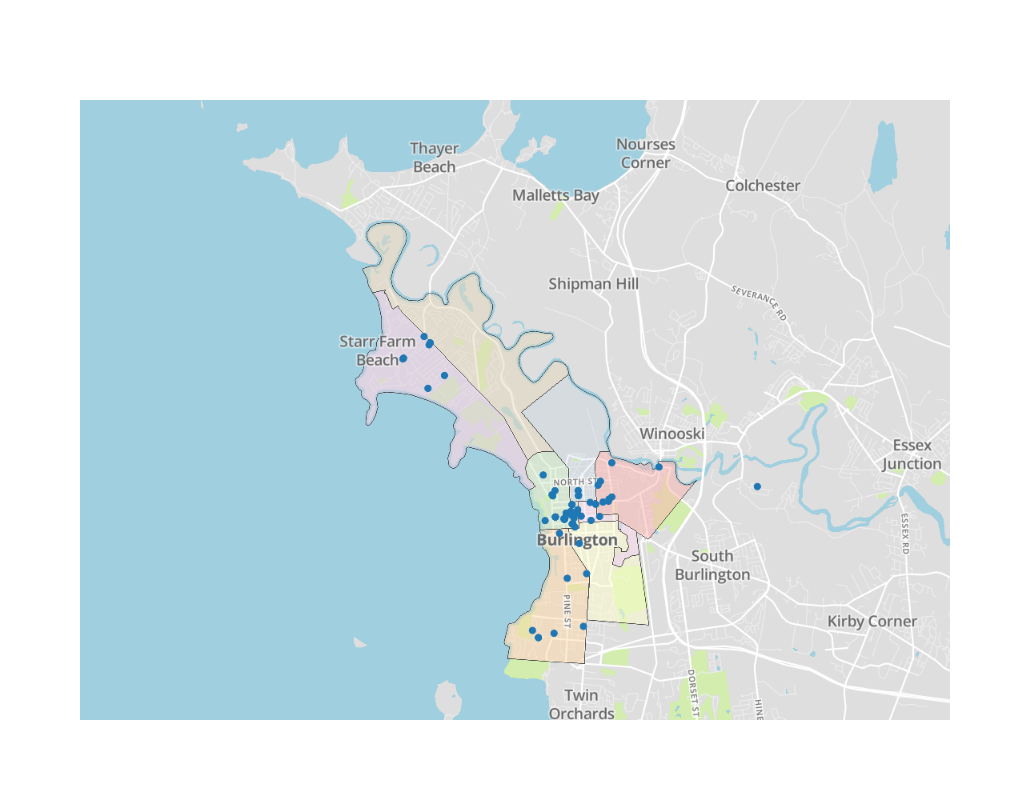

In [27]:
mapper("HANDY")

In [16]:
colors = ["rgba(251,180,174,0.5)",
"rgba(179,205,227,0.2)",
"rgba(204,235,197,0.5)",
"rgba(222,203,228,0.5)",
"rgba(254,217,166,0.5)",
"rgba(255,255,204,0.5)",
"rgba(229,216,189,0.5)",
"rgba(253,218,236,0.5)"
]

files = [
    'ward1.json', 
    'ward2.json',
    'ward3.json', 
    'ward4.json', 
    'ward5.json',
    'ward6.json',
    'ward7.json',
    'ward8.json']

In [9]:
import json

In [10]:
burlington = json.load(open('burlington.json'))

In [11]:
for i, name in enumerate(files):
    with open(name, 'w') as f:
        f.write(json.dumps(burlington['features'][i]))

In [24]:
layers = []
for i, name in enumerate(files):
    layers.append(
        dict(
            sourcetype = 'geojson',
            source = json.load(open(name)),
            type = 'fill',
            color = colors[i],
            below="road_major_label"
        )
    )

In [31]:
geocodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10831 entries, 0 to 10830
Data columns (total 24 columns):
Unnamed: 0                 10831 non-null int64
lookup-id                  10831 non-null object
Owner Name 1               10831 non-null object
Mailing Address 1          10831 non-null object
City                       10831 non-null object
State                      10831 non-null object
Zip                        10831 non-null object
Location #                 10831 non-null int64
Location Street            10831 non-null object
Parcel ID                  10831 non-null object
Span #                     10831 non-null object
VT Use Category Code       10831 non-null object
VT Use Category            10831 non-null object
Category                   10831 non-null object
Ownership Code             10831 non-null object
Tax Status                 10831 non-null object
Total Acres                10831 non-null float64
Listed Real Value          10831 non-null float64
% Busines